In [15]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot
import matplotlib.ticker as mtick
from pyne import serpent
from pyne import nucname
from sklearn.linear_model import LinearRegression
from scipy import stats

#res = serpent.parse_res('temp_coeff/tap_doppler_den_res.m', write_py=False)
#res = serpent.parse_res('temp_coeff/600_1200K/600_900_1200.m', write_py=False)
#res = serpent.parse_res('/home/andrei2/Desktop/git/ta_xe_equilibrium_test/temp_coeff/800_1300K/800_1300K_main_res.m', write_py=False)
res = serpent.parse_res('../../../safety_analysis/tap/333rods/boc/tap_safety_param_res.m', write_py=False)

# number of control rod worths measurements
cr = 1

Fuel density [5.0874 5.0238 4.9602 4.8966 4.833  4.7694 4.7058 4.6422 4.5786]  for temperature        [ 800  850  900  950 1000 1050 1100 1150 1200]

nom ftc800 ftc850 ftc950 ftc1000 ftc1050 ftc1100 ftc1150 ftc1200 mtc800 mtc850 mtc950 mtc1000 mtc1050 mtc1100 mtc1150 mtc1200 itc800 itc850 itc950 itc1000 itc1050 itc1100 itc1150 itc1200 crw0
Multiplication factor [1.01894  1.01949  1.01892  1.01912  1.01877  1.01908  1.01952  1.01952
 1.02011  1.02027  1.0195   1.01831  1.01763  1.01732  1.01668  1.01607
 1.01519  1.02072  1.0196   1.01831  1.01742  1.01705  1.01724  1.01673
 1.01641  0.980058]
STD for Keff [13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13.
 13. 13. 13. 13. 13. 13. 13. 14.]
[1.01949, 1.01892, 1.01894, 1.01912, 1.01877, 1.01908, 1.01952, 1.01952, 1.02011]


<IPython.core.display.Javascript object>


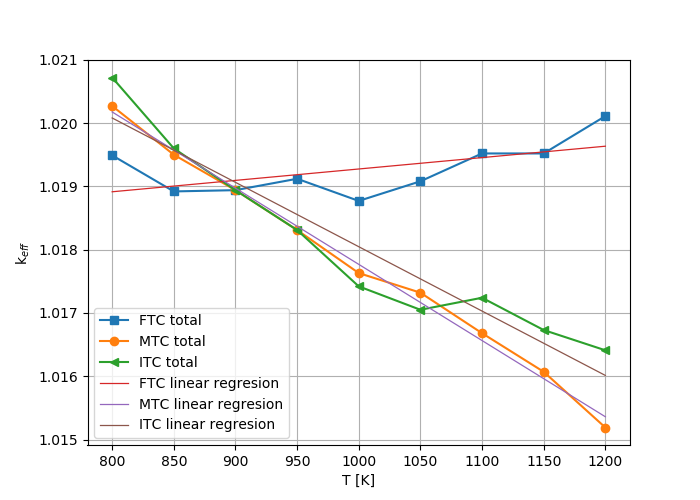

Regression R-squred: FTC 0.342538; MTC 0.994707; ITC 0.919314
Regression STD: FTC 0.000001; MTC: 0.000000; ITC: 0.000001

Control rods worth 3888.200000 +/- 19.104973 pcm, 3.893572 %


In [16]:
keff = res['IMP_KEFF'][:,0]         # K-eff parsing from dictionary
keff_err = res['IMP_KEFF'][:,1]         # K-eff standart deviation

#T = [900, 600, 1200, 600, 1200, 600, 1200]
#T = [900, 980, 1060]
T = np.array([800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200])
fuel_den = 6.105-0.001272*np.asarray(T)
print ('Fuel density', fuel_den, ' for temperature       ', T)

# dT = [80, 80, 80, 20, 20, 20]
print('\nnom ftc800 ftc850 ftc950 ftc1000 ftc1050 ftc1100 ftc1150 ftc1200 mtc800 mtc850 mtc950 mtc1000 mtc1050 mtc1100 mtc1150 mtc1200 itc800 itc850 itc950 itc1000 itc1050 itc1100 itc1150 itc1200 crw0')
print('Multiplication factor', keff)
print('STD for Keff', keff_err*1e5)

# FTC total
ftc_k = []
ftc_k_e = []
for i in [1,2,0,3,4,5,6,7,8]:
    ftc_k.append(keff[i])
    ftc_k_e.append(keff_err[i])

print(ftc_k)
# MTC total
mtc_k = []
mtc_k_e = []
for i in [9,10,0,11,12,13,14,15,16]:
    mtc_k.append(keff[i])
    mtc_k_e.append(keff_err[i])
# ITC
itc_k = []
itc_k_e = []
for i in [17,18,0,19,20,21,22,23,24]:
    itc_k.append(keff[i])
    itc_k_e.append(keff_err[i])

ftc_r = stats.linregress(T, ftc_k)
mtc_r = stats.linregress(T, mtc_k)
itc_r = stats.linregress(T, itc_k)

    
fig_1 = matplotlib.pyplot.figure(1, figsize=[7,5])
ax1 = fig_1.add_subplot(111)
ax1.grid(True)
ax1.set_xlabel('T [K]')
ax1.set_ylabel(r'k$_{eff}$') #, color='b', fontsize=14)
#ax1.tick_params('y') #, colors='b')
#ax.set_ylim(0,1.6E+21)
#ax1.set_xlim(1e-8,15)
ax1.plot(T, ftc_k, 's-',label='FTC total')
ax1.plot(T, mtc_k, 'o-', label='MTC total')
ax1.plot(T, itc_k, '<-', label='ITC total')
ax1.plot(T, ftc_r.intercept + ftc_r.slope * T, linewidth=0.9, label='FTC linear regresion')
ax1.plot(T, mtc_r.intercept + mtc_r.slope * T, linewidth=0.9, label='MTC linear regresion')
ax1.plot(T, itc_r.intercept + itc_r.slope * T,  linewidth=0.9, label='ITC linear regresion')
ax1.legend(loc=0)
fig_1.show()
#fig_1.savefig('keff_tc_800_1200.png',bbox_inches='tight', dpi=700)
#########################################################
ftc800 = 1e+5*(ftc_k[0] - ftc_k[1]) / (ftc_k[0]*ftc_k[1]*(T[0]-T[1]))
ftc800_err = 1e+5*math.sqrt(ftc_k_e[0]**2/ftc_k[0]**4 + ftc_k_e[1]**2/ftc_k[1]**4) * \
            abs(1/(T[0]-T[1]))
ftc1000 = 1e+5*(ftc_k[1] - ftc_k[2]) / (ftc_k[1]*ftc_k[2]*(T[1]-T[2]))
ftc1000_err = 1e+5*math.sqrt(ftc_k_e[1]**2/ftc_k[1]**4 + ftc_k_e[2]**2/ftc_k[2]**4) * \
            abs(1/(T[1]-T[2]))
#########################################################
mtc800 = 1e+5*(mtc_k[0] - mtc_k[1]) / (mtc_k[0]*mtc_k[1]*(T[0]-T[1]))
mtc800_err = 1e+5*math.sqrt(mtc_k_e[0]**2/mtc_k[0]**4 + mtc_k_e[1]**2/mtc_k[1]**4) * \
            abs(1/(T[0]-T[1]))
mtc1000 = 1e+5*(mtc_k[1] - mtc_k[2]) / (mtc_k[1]*mtc_k[2]*(T[1]-T[2]))
mtc1000_err = 1e+5*math.sqrt(mtc_k_e[1]**2/mtc_k[1]**4 + mtc_k_e[2]**2/mtc_k[2]**4) * \
            abs(1/(T[1]-T[2]))
########################################################
itc800 = 1e+5*(itc_k[0] - itc_k[1]) / (itc_k[0]*itc_k[1]*(T[0]-T[1]))
itc800_err = 1e+5*math.sqrt(itc_k_e[0]**2/itc_k[0]**4 + itc_k_e[1]**2/itc_k[1]**4) * \
            abs(1/(T[0]-T[1]))
itc1000 = 1e+5*(itc_k[1] - itc_k[2]) / (itc_k[1]*itc_k[2]*(T[1]-T[2]))
itc1000_err = 1e+5*math.sqrt(itc_k_e[1]**2/itc_k[1]**4 + itc_k_e[2]**2/itc_k[2]**4) * \
            abs(1/(T[1]-T[2]))

print("Regression R-squred: FTC %f; MTC %f; ITC %f" % (ftc_r.rvalue**2, mtc_r.rvalue**2, itc_r.rvalue**2) )
print("Regression STD: FTC %f; MTC: %f; ITC: %f" %(ftc_r.stderr,mtc_r.stderr,itc_r.stderr))

crw = abs(keff[-1] - keff[0])
crw_err = 1e+5*math.sqrt(keff_err[-1]**2 + keff_err[0]**2)
print ('\nControl rods worth %f +/- %f pcm, %f %%' %(1e+5*crw,crw_err, 100*crw/(keff[-1]*keff[0])) )

# Calculations of geometry change

In [ ]:
thermal_exp_zrh = 2.734e-5    # 1/K
thermal_exp_sic = 2.7742e-6   # 1/K

r_0 = 1.15
r_1 = 1.25
h = 150.0
T = np.array([800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300])
T_base = 900
dT = T - T_base
r_0_new = []
r_1_new = []
h_new = []
den_zrh = []
den_sic = []

den_zrh_base = 5.66
V_zrh = h * math.pi * r_0**2
mass_zrh = den_zrh_base * V_zrh

den_sic_base = 3.21
V_sic = h * math.pi * (r_0**2 - r_1**2)
mass_sic = den_sic_base * V_sic


fuel_den = 6.105-0.001272*np.asarray(T)
print("Fuel salt Density, g/cm3", fuel_den)

for t in dT:
    r_0_new.append(r_0*(1 + thermal_exp_zrh*t))
    r_1_new.append((r_1-r_0)*(1 + thermal_exp_sic*t) + r_0*(1 + thermal_exp_zrh*t))
    h_new.append(h*(1 + thermal_exp_zrh*t) )

for i in range(len(T)):
    den_zrh.append(mass_zrh / (h_new[i]*math.pi*r_0_new[i]**2))
    den_sic.append(mass_sic / (h_new[i]*math.pi*(r_0_new[i]**2 - r_1_new[i]**2)))
    print("At %4iK: R of ZrH %4.9f cm, R of SiC %4.9f, cm, height %4.9f cm" %(
            T[i],
            r_0_new[i],
            r_1_new[i],
            h_new[i]  ) )

zrh_den = mass_zrh / (h_new[0]*math.pi*r_0_new[0]**2)
idx = 10
print("\n%% ----- Moderator rod at %4iK" %T[idx])
print("surf 1%i cyl    0.0 0.0 %4.9f" % (T[idx],r_0_new[idx]))
print("surf 2%i cyl    0.0 0.0 %4.9f" % (T[idx],r_1_new[idx]))
print("surf 3%i sqc    0.0 0.0 1.5" % (T[idx]))
print("surf 4%i pz     -%4.9f" % (T[idx],h_new[idx]))
print("surf 5%i pz      %4.9f" % (T[idx],h_new[idx]))
print("cell 1%i  M%i  fill 3 -1%i -5%i 4%i" % (T[idx],T[idx],T[idx],T[idx],T[idx]))
print("cell 2%i  M%i  fill 4 -2%i 1%i -5%i 4%i" % (T[idx],T[idx],T[idx],T[idx],T[idx],T[idx]))
print("cell 3%i  M%i  fill 2 -3%i 2%i -5%i 4%i" % (T[idx],T[idx],T[idx],T[idx],T[idx],T[idx]))
print("cell 4%i  M%i  fill 2 -3%i -4%i 6" % (T[idx],T[idx],T[idx],T[idx]))
print("cell 5%i  M%i  fill 2 -3%i -7 5%i" % (T[idx],T[idx],T[idx],T[idx]))
print("\n")
for i in range(len(T)):
    print("At %4iK ZrH density  %4.11f g/cm3, SiC density %4.11f g/cm3" % (T[i],den_zrh[i], den_sic[i]))

# Void coefficient

In [13]:
rho_salt = 4.9602  # g/cc
rho_he = 5.26e-5   # g/cc at T=900K
# void_percent = 0.011867/100  # fraction of 0.011867% see above
# void_percent = 0.2/100  # fraction of 0.2% see above
# void_percent = 0.5/100  # fraction of 0.5% see above
# void_percent = 1.0/100  # fraction of 0.1% see above
void_percent = np.linspace(0, 2, 5)


#void_percent = np.arange(0, 1.1, 0.1)/100
print('Void %', void_percent)
rho_mix = (1-(1/100)*void_percent)*rho_salt + (1/100)*void_percent * rho_he

print("Density of the salt+He bubbles [g/cm3]", rho_mix)
# print("2004.09c -%.14e" %(rho_he*void_percent/rho_salt))

Void % [0.  0.5 1.  1.5 2. ]
Density of the salt+He bubbles [g/cm3] [4.9602     4.93539926 4.91059853 4.88579779 4.86099705]


[1.02162, 0.972578, 0.98776, 0.984079, 0.983473]
[0.00755, 0.00665, 0.00595, 0.00727, 0.00605]
[0.  0.5 1.  1.5 2. ]
LinregressResult(slope=-0.012958599999999976, intercept=1.0028606, rvalue=-0.5503634720538425, pvalue=0.3364436808155108, stderr=0.011349988247277308)


<IPython.core.display.Javascript object>


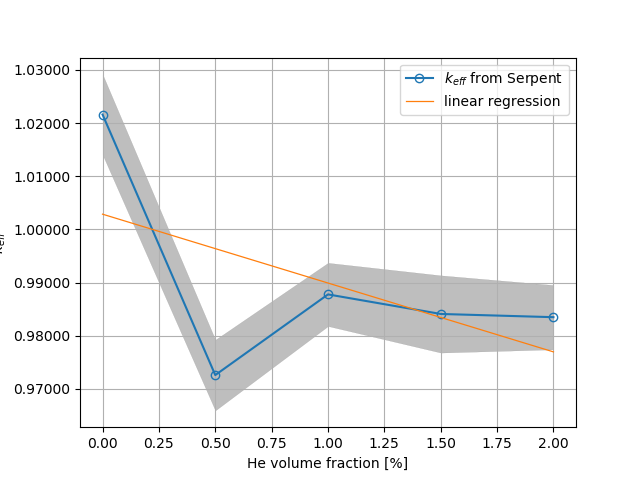

From Serpent $\alpha_v$ = -1907.35 +/- 478.16 pcm/void%
Smoothed using linear regression $\alpha_v$ = -1295.860000 pcm/void%


In [14]:
void_k = []
void_k_e = []

for i in [0, 25, 26, 27, 28]:
    void_k.append(keff[i])
    void_k_e.append(keff_err[i])

print(void_k)
print(void_k_e)
print(void_percent)

av_r = stats.linregress(void_percent, void_k)
print(av_r)

# Initialize figure
fig_4 = matplotlib.pyplot.figure(4)
ax = fig_4.add_subplot(111)
ax.grid(True)
ax.plot(void_percent, void_k, 'o-', linewidth=1.5, markerfacecolor="None", label=r'$k_{eff}$ from Serpent')
ax.plot(void_percent, av_r.intercept + av_r.slope * void_percent, linewidth=0.9, label=r'linear regression')
ax.fill_between(void_percent, np.asarray(void_k)-np.asarray(void_k_e), np.asarray(void_k)+np.asarray(void_k_e), edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)

ax.set_ylabel(r'$k_{eff}$')
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.5f'))
ax.set_xlabel(r'He volume fraction [%]')
#ax.set_xlim(0, 1)
#ax.set_ylim(1.036, 1.038)
#ax.set_title('Multiplication factor for online reprocessing case ' + str(EOS) +' days')
ax.legend(loc=0)
fig_4.show()
#fig_4.savefig('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/dissertation/figures/ch4/void_coeff_regression.png',bbox_inches='tight', dpi=700)
sim_a_v = 1e5*(void_k[-1]-void_k[0])/(void_percent[-1]-void_percent[0])
sim_a_v_std = 1e+5*math.sqrt(void_k_e[0]**2/void_k[0]**4 + void_k_e[-1]**2/void_k[-1]**4) * \
            abs(1/(void_percent[-1]-void_percent[0]))

print(r'From Serpent $\alpha_v$ = %.2f +/- %.2f pcm/void%%' %(sim_a_v, sim_a_v_std))
print(r'Smoothed using linear regression $\alpha_v$ = %f pcm/void%%' %(1e5*av_r.slope))